# Run the simulation

## Intro
This notebook demonstrates how to set the parameters for one simulation instance, run it and plot the results.

In [1]:
# coding: utf8
import os, sys
from sys import argv
sys.path.insert(0, os.getcwd()) # adds current directory to python path

from isae.sim_control.gradedSimulation import *
from isae.optim.genAlgParam import *

import multiprocessing

A quick check of the number of CPUs on the machine :

In [2]:
print("Number of CPUs : ", multiprocessing.cpu_count())

Number of CPUs :  16


## Setting the parameters
In this section, we define all the parameters that are expected by the 'gradedSimulation' class, which is a wrapper around the PyBullet client to specifically handle the SOLO simulation.

In [3]:
# Loop parameters 
pyb_gui = False # Necessary if run in a notebook
duration = 8

In [4]:
# Trajectory parameters
period = 1.5

In [5]:
# Feet trajectories
offsets = [0.5,0.,0.5,0.]

footTraj1 = footTrajectory([[-0.6,0],[-0.0,1.2], [0.6,0], [-0.6,0]], phaseOffset = offsets[0])
# Copy the first foot trajectory with previous offsets
footTraj2 = footTrajectory(         footTraj1.points           , phaseOffset = offsets[1])
footTraj3 = footTrajectory(         footTraj1.points           , phaseOffset = offsets[2])
footTraj4 = footTrajectory(         footTraj3.points           , phaseOffset = offsets[3])

trajs = [footTraj1, footTraj2, footTraj3, footTraj4]

#bodyHeights = 2*[1.3] + 2*[1.3]
bodyHeights = 2*[1.] + 2*[1.]
#bodyHeights = [1.7,1.7,1.7,1.7]

In [6]:
# Geometry and controller
leg = Leg(1,1)
#sols = [False, False, True, True]
sols = [True, True, False, False]
#sols = [False, False, False, False]
#sols = [True, True, True, True]

#Kp = 8
Kp = 8
#Kd = 0.2
Kd = 0.2

Now that all the 'basic' parameters are defined, we also need to create the controller, which could be different but is expected by the simulation as a parameter.

In [7]:
# Parameters :
# TODO
robotController = footTrajController(bodyHeights, leg, sols, trajs, period, Kp, Kd, 3 * np.ones((8, 1)))

## Initializing and running the simulation
We now have all the parameters to instantiate a gradedSimulation. We can then initialize it easily with the following methods :

In [8]:
# Create simulation
walkSim = gradedSimulation()

# Assign parameters to the simulation
walkSim.setLoopParams(pyb_gui, duration)
walkSim.setController(robotController)
walkSim.setTrajectoryParams(leg, period, trajs, bodyHeights) # too specific, will change

walkSim.initializeSim()

It is finally time to run the simulation. We also get a printed output to check how long it took and the selected fitness (TODO)

In [9]:
# Run sim
walkSim.runSim()

##########################################
Simulation finished in 6.133011999999999 s
##########################################


## Plotting the results
Once the simulation is finished, there are many methods in the gradedSimulation class to plot some results. Here are some examples :

### Base position

<IPython.core.display.Javascript object>


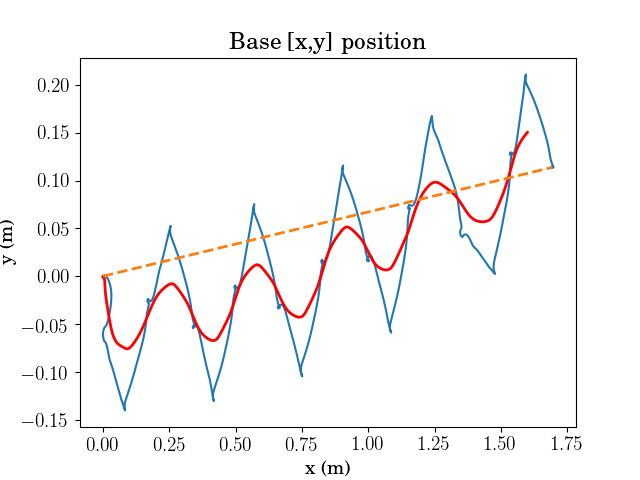

In [14]:
%matplotlib notebook
walkSim.plotBasePos()

### Base speed

<IPython.core.display.Javascript object>


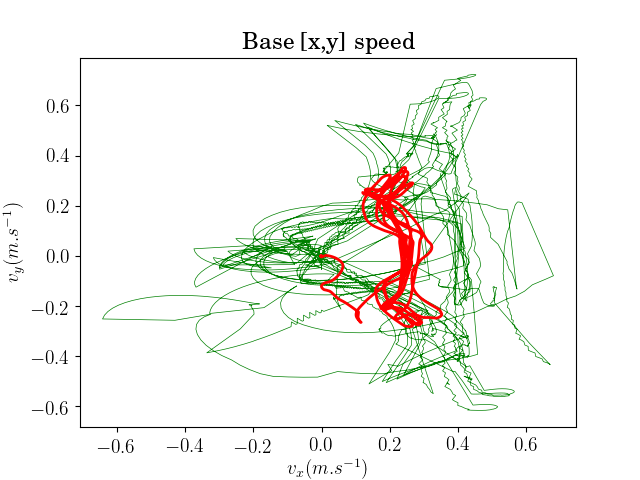

In [20]:
%matplotlib notebook
walkSim.plotBaseSpeed()

<IPython.core.display.Javascript object>


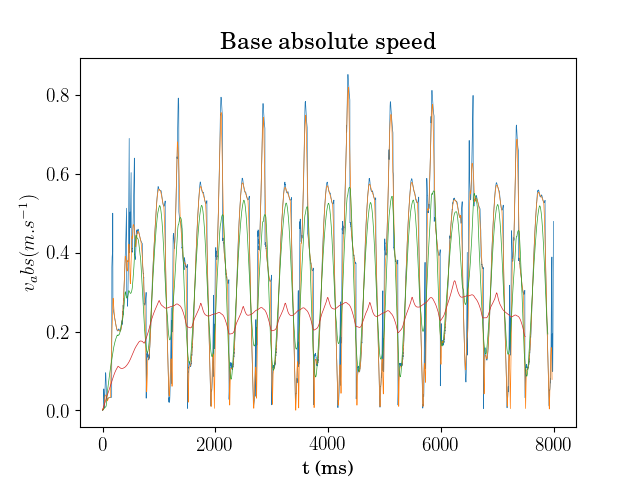

In [21]:
%matplotlib notebook
walkSim.plotBaseAbsXYSpeed(filters=[50,200,1000])

### Contacts

<IPython.core.display.Javascript object>


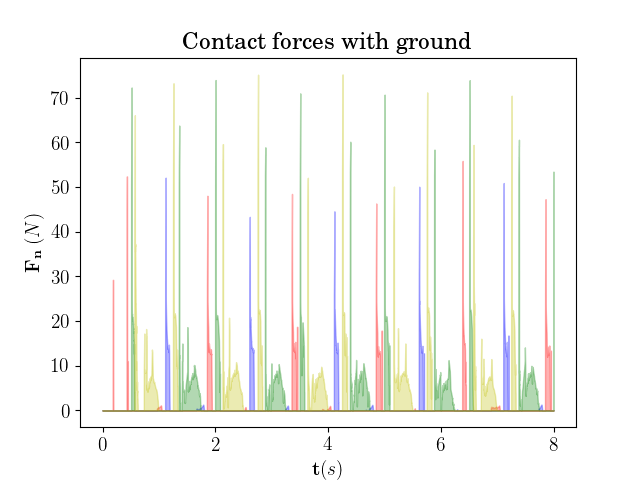

In [11]:
%matplotlib notebook
walkSim.plotContactForces()

31139 contact points


<IPython.core.display.Javascript object>


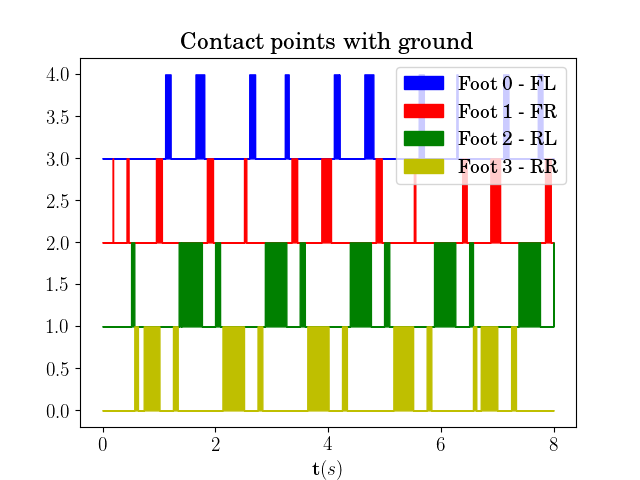

In [13]:
%matplotlib notebook
walkSim.plotContactPoints()